# TMDB -- The Movie Database

<b> Dataset </b> <br>
26 million ratings . 270,000 users . 45,000 movies

<b>Pipeline</b> <br>
* Import Libraries
* 1--Data Observation
* 2--Data Wrangling
* 3--EDA
* 4--Regression: Predicting Movie Revenue
* 5--Classification: Predicting Movie Success

<b> Reference used for copy and study:</b> <br>
Dataset: https://www.kaggle.com/rounakbanik/the-movies-dataset <br>
EDA: https://www.kaggle.com/rounakbanik/the-story-of-film/ <br>
Recommendation System: https://www.kaggle.com/rounakbanik/movie-recommender-systems


# Import Libraries

In [1]:
from IPython.display import Image, HTML
import json
import datetime
import ast

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import chart_studio
chart_studio.tools.set_credentials_file(username='rounakbanik', api_key='xTLaHBy9MVv5szF4Pwan')

sns.set_style('whitegrid')
sns.set_palette("GnBu_d")
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

# 1--Data Observation

FEATURES

* adult: X-Rated or Adult 
* belongs_to_collection: Breakdown information on movie series
* budget: Budget in USD$
* genres: Genres 
* homepage: The official Homepage 
* id: id 
* imdb_id: IMDB ID 
* original_language: Language which the movie was originally shot in
* original_title: Original title of the movie 
* overview: Brief summary of movie
* popularity: TMDB popularity score 
* poster_path: Poster link 
* production_countries : Production countries
* production_companies: Production companies 
* release_date: Theatrical Release Date 
* revenue: Total revenue in USD$ 
* runtime: Total runtime in minutes 
* spoken_languages: Spoken languages 
* status: Status such as Released, To Be Released, Announced, etc 
* tagline: Tagline 
* title: The official title 
* video: Indicates if there is a video present of the movie with TMDB
* vote_average: The average rating of the movie 
* vote_count: The number of votes by uses, counted by TMDB 

In [2]:
tmdb = pd.read_csv("/Users/wonghuiee/AI_DataScience/Xccelerate/04MLApplications/TMDB/Dataset/movies_metadata.csv")
tmdb.head().transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


There are 45,466 movies with 24 features. Most features have very few NaN values except homepage and tagline. 

In [3]:
tmdb.shape

(45466, 24)

In [4]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

# 2--Data Wrangling

* drop **imdb_id** 
* drop **original_title**
* drop **adult**
* **revenue** replace 0 to np.nan
* **budget** replace non-numeric to np.nan
* construct feature **year** : The year in which movie is released
* construct feature **return** : The ratio of revenue to budget

In [5]:
# drop "imdb_id"
tmdb = tmdb.drop(["imdb_id"], axis=1)

In [6]:
# drop "original_title"
# We will be able to deduce if the movie is a foreign language file by looking at "original_language"
tmdb[tmdb[ "original_title"] != tmdb["title"] ][ ["title", "original_title"]].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


In [7]:
# drop "original_title"
tmdb = tmdb.drop("original_title", axis = 1)

In [8]:
# drop "adult"
# there are close to 0 adult movies. The adult feature is not much use and can be safely dropped
tmdb["adult"].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

In [9]:
# drop "adult"
tmdb = tmdb.drop("adult", axis=1)

In [10]:
# majority of revenue is 0
tmdb[tmdb["revenue"]==0].shape

(38052, 21)

In [11]:
# "revenue" replace 0 to np.nan
tmdb["revenue"] = tmdb["revenue"].replace(0, np.nan)

In [12]:
# "budget" replace non-numeric to np.nan
tmdb["budget"] = pd.to_numeric(tmdb["budget"], errors="coerce")
tmdb["budget"] = tmdb["budget"].replace(0, np.nan)
tmdb[tmdb["budget"].isnull()].shape

(36576, 21)

**year** : The year in which the movie was released

In [13]:
tmdb["year"] = pd.to_datetime(tmdb["release_date"], errors="coerce").apply(
    lambda x:str(x).split("-")[0] if x!=np.nan else np.nan)

**return** : The ratio of revenue to budget<br>
**return** gives us an accurate picture of the financial success of the movie. As of current, our data will not be able to judge if a $200mil budget movie that earned $100mil did better than $50,000 budget movie earned $200,000. This feature will capture the information

return value > 1 indicate profit <br>
return value < 1 indicate loss

We have close to **5000 movies** which we have data on revenue and budget ratio. This is close to **10% of the entire dataset**. Although this may seem small, this is enough to perform very useful analysis and discover interesting insights.

In [14]:
tmdb["return"] = tmdb["revenue"] / tmdb["budget"]
tmdb[tmdb["return"].isnull()].shape

(40085, 23)

In [15]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
tmdb['poster_path'] = "<img src='" + base_poster_url + tmdb['poster_path'] + "' style='height:100px;'>"

# 3--EDA

* Title and Overview Wordcloud
* Franchise Movies
* Production Countries
* Production Companies
* Orginal Language
* Popularity, Vote Average, Vote Count
* Movie Release Date
* Number of Movies by Year
* Earliest Movies Represented
* Movie Status
* Spoken Languages
* Runtime
* Budget
* Revenue
* Highest Grossing Films of All Time
* Returns
* Genres
* Cast and Crew

### Title and Overview Worldcloud

Are there certain words that figure more often in Movie Titles and Movie Blurbs ?

In [16]:
tmdb["title"] = tmdb["title"].astype("str")
tmdb["overview"] = tmdb["overview"].astype("str")

In [17]:
titleCorpus = " ".join(tmdb["title"])
overviewCorpus = " ".join(tmdb["overview"])

In [18]:
stopwords = set(STOPWORDS)
cloudMask = np.array(Image.open("/Users/wonghuiee/AI_DataScience/Xccelerate/04MLApplications/TMDBMovieRecommendationSystem/Input/cloud.jpg"))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/wonghuiee/AI_DataScience/Xccelerate/04MLApplications/TMDBMovieRecommendationSystem/Input/cloud.jpg'

The word **Love** is the most commonly used in movie titles. **Girl, Day,** and **Man** are also among the most commonly occuring words. This encapsulates the idea of ubiquitious presence of romance in movies

(-0.5, 639.5, 447.5, -0.5)

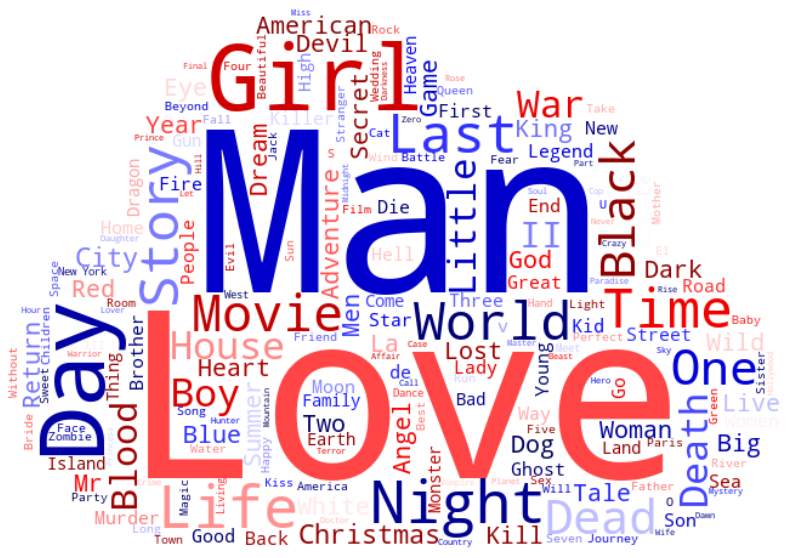

In [ ]:
# wordcloud color
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

titleWorldCloud = WordCloud(background_color="white", 
                            colormap="seismic",
                            mask=cloudMask,
                            stopwords=stopwords, 
                            width=500, 
                            height=500,).generate(titleCorpus)

matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.figure()
plt.imshow(titleWorldCloud, interpolation="bilinear")
plt.axis("off")

The word **Life** is the most commonly used in movie blurbs. **One** and **Find** are also popular are also among the most commonly occuring words. These gives us a good idea of the most popular themes present in movies.

(-0.5, 639.5, 447.5, -0.5)

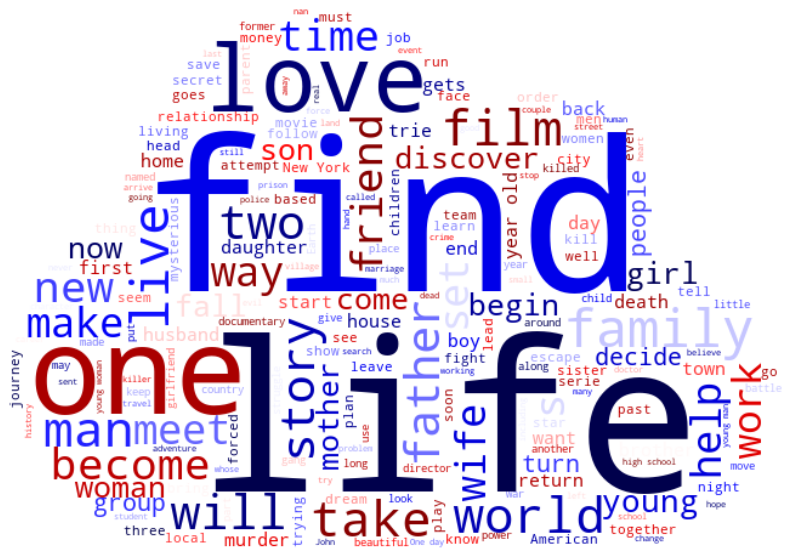

In [ ]:
# wordcloud color
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

overviewWorldCloud = WordCloud(background_color="white", 
                        colormap="seismic",
                        mask=cloudMask,
                        stopwords=stopwords, 
                        width=500, 
                        height=500,).generate(overviewCorpus)

matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.figure()
plt.imshow(overviewWorldCloud, interpolation="bilinear")
plt.axis("off")

### Franchise Movies

Let us have a brief look at Franchise Movies. I was curious to discover the longest running and the most successful franchises among many other things.

In [19]:
franDF = tmdb[tmdb["belongs_to_collection"].notnull()]
franDF["belongs_to_collection"] = franDF["belongs_to_collection"].apply(ast.literal_eval).apply(lambda x:x["name"] if isinstance(x, dict) else np.nan)
franDF = franDF[franDF["belongs_to_collection"].notnull()]

In [20]:
franPivot = franDF.pivot_table(index="belongs_to_collection", values="revenue", aggfunc={"revenue": ["mean", "sum", "count"]}).reset_index()

**Highest Gross**. The **Harry Potter** Franchise is the most successful movie franchise raking in more than 7.7 billion dollars from 8 movies. The **Star Wars** Movies come in close second with a 7.4 billion dollars from 8 movies too. **James Bond** is third but the franchise has significantly more movies compared to others in the list, therefore much smaller average gross.

In [21]:
# Highest grossing movie franchises
franPivot.sort_values("sum", ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


**Highest by Average Gross**. The **Avatar** Collection, although just consisting of one movie at the moment, is the most successful franchise of all time with the sole movie raking in close to 3 billion dollars. The **Harry Porter** franchise is still the most successful franchise with at least 5 movies

We will use the average gross per movie to gauge the sucess of a movie franchise. However, this is not a very potent metric as the revenues in this dataset have not been adjusted for inflation. Therefore, revenue statistics will tend to strongly favor franchises in the recent times.

In [22]:
# Most Successful movie franchise (by average gross)
franPivot.sort_values("mean", ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


**Longest Running Franchises**. Let's look at the franchises which have stood the test of time and have managed to deliver the largest number of movies under a single banner. This metric is potent in the way that it isnt affected by inflation. However, this does not imply that successful movie franchises tend to have more movies. Some franchises, such as Harry Potter, have a predefined storyline and it wouldn't make sense to produce more movies despite its enormous success

The **James Bond** Movies is the largest franchise over 26 movies released under the banner. **Friday the 13th** and **Pokemon** come in at a distant second and third with 12 and 11 movies respectively

In [23]:
franPivot.sort_values("count", ascending=False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
977,Police Academy Collection,7,4.352046e+07,3.046432e+08


### Production Countries

The Full MovieLens Dataset consists of movies that are overwhelmingly in English language (more than 31000). However, these movies may have shot in various locations around the world. It would be interesting to see which countries serve as the most popular destinations for shooting movies by filmakers, especially those in the USA and UK.

Unsurprisingly, the **United States** is the most popular destination of production for movies given that our dataset largely consists of English movies. **Europe** is also an extremely popular location with the UK, France, Germany and Italy in the top 5. **Japan** and **India** are the most popular Asian countries when it comes to movie production

In [24]:
tmdb["production_countries"] = tmdb["production_countries"].fillna("[]").apply(ast.literal_eval)
tmdb["production_countries"] = tmdb["production_countries"].apply(lambda x:[i["name"] for i in x] if isinstance(x, list) else [])

In [25]:
con = tmdb.apply(lambda x: pd.Series(x["production_countries"]), axis=1).stack().reset_index(level=1, drop=True)
con.name = "countries"

In [26]:
conDF = tmdb.drop('production_countries', axis=1).join(con)
conDF = pd.DataFrame(conDF['countries'].value_counts())
conDF['country'] = conDF.index
conDF.columns = ['num_movies', 'country']
conDF = conDF.reset_index().drop('index', axis=1)
conDF.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


In [27]:
conDF = conDF[conDF["country"] != "United States of America"]

In [28]:
data = [ dict(
        type = 'choropleth',
        locations = conDF['country'],
        locationmode = 'country names',
        z = conDF['num_movies'],
        text = conDF['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

### Production Companies

In [29]:
tmdb["production_companies"] = tmdb["production_companies"].fillna("[]").apply(ast.literal_eval)
tmdb["production_companies"] = tmdb["production_companies"].apply(lambda x:[i["name"] for i in x] if isinstance(x, list) else [])

In [30]:
comp = tmdb.apply(lambda x: pd.Series(x["production_companies"]), axis=1).stack().reset_index(level=1, drop=True)
comp.name = "companies"

In [31]:
compDF = tmdb.drop("production_companies", axis=1).join(comp)

In [32]:
compSum = pd.DataFrame(compDF.groupby("companies")["revenue"].sum().sort_values(ascending=False))
compSum.columns = ["Total"]
compMean = pd.DataFrame(compDF.groupby("companies")["revenue"].mean().sort_values(ascending=False))
compMean.columns = ["Average"]
compCount = pd.DataFrame(compDF.groupby("companies")["revenue"].count().sort_values(ascending=False))
compCount.columns = ["Number"]
compPivot = pd.concat((compSum, compMean, compCount), axis=1)

**Highest Earning Production Companies**. **Warner Bros** is the highest earning production company of all time earning a staggering 6.35 bil dollars from close to 500 movies. **Universal Pictures** are the second and third highest eaerning companies with 55 bil dollars and 48 bil dollars in revenue respectively.

In [33]:
compPivot.sort_values("Total", ascending=False).head(10)

,Total,Average,Number
companies,,,
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78


**Most Successful Production Companies**. **Pixar Animation Studios** has produced the most successful movies, on average. This is not surprising considering the amazing array of movies that it has produced in the last few decades. Up, Finding Nemo, Inside Out, Wall-E, Ratatouille, the Toy Story, Franchise, Car Franchise etc. **Marvel Studios** with an average gross of 615 mil dollars comes in second with movies such as Iron Man and The Avengers under its banners. We consider only those companies that have made at least 15 movies

In [34]:
compPivot[compPivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
companies,,,
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19


### Original Language

There are over 93 languages represented in our dataset. As expected, **English** language films form the overwhelmingly majority. **French** and **Italian** movies come at a very distant second and third respectively. **Japanese** and **Hindi** from maority as far as Asian Languages are concerned.

In [35]:
tmdb["original_language"].drop_duplicates().shape[0]

93

In [36]:
langDF = pd.DataFrame(tmdb["original_language"].value_counts())
langDF["language"] = langDF.index 
langDF.columns = ["number", "language"]
langDF.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


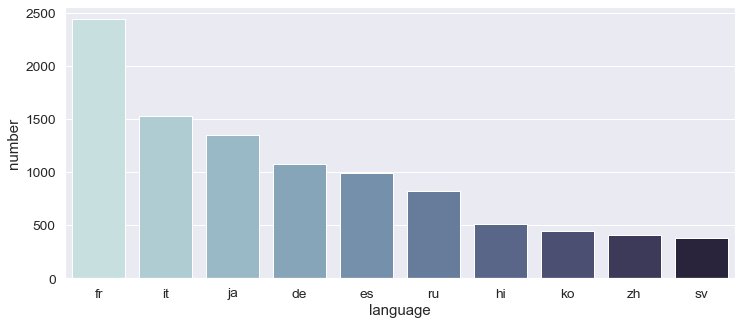

In [37]:
plt.figure(figsize=(12,5))
sns.barplot(x="language", y="number", data=langDF.iloc[1:11], palette="ch:start=.2,rot=-.3")
plt.show()

### Popularity, Vote Average, Vote Count

In this section, we will work with metrics provided to us by TMDB users. We will try to gain a deeper understanding of the popularity, vote average and vote count features and try and deduce any relationships between them as well as other numeric features such as budget and revenue

In [38]:
def cleanNumeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [39]:
tmdb["popularity"] = tmdb["popularity"].apply(cleanNumeric).astype("float")
tmdb["vote_count"] = tmdb["vote_count"].apply(cleanNumeric).astype("float")
tmdb["vote_average"] = tmdb["vote_average"].apply(cleanNumeric).astype("float")

**Popularity**. The **Popularity Score** seems to be extremely skewed quantity with a mena of only 2.9 but maximum value reaches 547. However, as can be seen from the distribution plot, almost all movies have a popularity score less than 10. The 75th percentile is at 3.67

In [40]:
tmdb["popularity"].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

<AxesSubplot:ylabel='Frequency'>

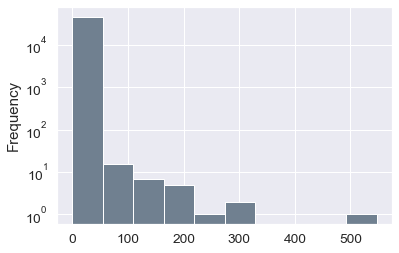

In [41]:
# https://matplotlib.org/stable/gallery/color/named_colors.html
tmdb["popularity"].plot(logy=True, 
                        kind="hist",
                        color="slategrey")

**Most Popular Movies by Popularity Score**. **Minions** is the most popular movie by TMDB Popularity Score. **Wonder Woman** and **Beauty and the Beast**, two extremely successful women centric movies come in second and third respectively.

In [42]:
tmdb[["title", "popularity", "year"]].sort_values("popularity", ascending=False).head(10)

,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


**Vote Counts**. As with popularity scores, the distribution of vote counts is extremely skewed with the median vote count standing at a paltry 10 votes. The most votes a single movie has got stands at 14,075. TMDB Votes, therefore, are not as potent and suggestive as its IMDB Counterpart. Nevertheless, let us check which the most voted on movies on website are.

In [43]:
tmdb["vote_count"].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

**Most Voted on Movies**. **Inception** and **The Dark Knight**, two critically acclaimed and commercially successful Christopher Nolan movies figure at the top of our chart. It appears that TMDB users are extremely strict in their ratings. The mean rating is only at 5.6 on a scale of 10. Half the movies have a rating of less than or equal to 6.

In [44]:
tmdb[["title", "vote_count", "year"]].sort_values("vote_count", ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


In [45]:
tmdb["vote_average"] = tmdb["vote_average"].replace(0, np.nan)
tmdb["vote_average"].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

In [46]:
sns.set_style("whitegrid")
sns.set_palette("GnBu_d")

<AxesSubplot:xlabel='vote_average'>

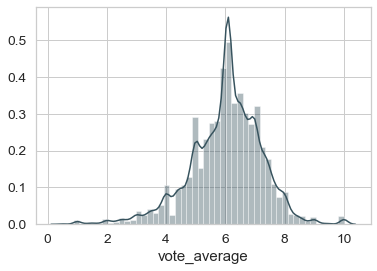

In [47]:
sns.distplot(tmdb["vote_average"].fillna(tmdb["vote_average"].median()))

**Most Critically Acclaimed Movies**. **The Shawshank Redemption** and **The Godfather** are the two most critically acclaimed movies in the TMDB Database. Interestingly, they are the top 2 movies in IMDB's Top 250 Movies list too. They have a rating of over 9 on IMDB as compared to their 8.5 TMDB Scores. We consider movies that have more than 2000 votes (similar to IMDB's criteria of 5000 votes in selecting its top 250)

In [48]:
tmdb[tmdb["vote_count"]>2000][["title", "vote_average", "vote_count", "year"]].sort_values("vote_average", ascending=False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.5,8358.0,1994
834,The Godfather,8.5,6024.0,1972
2211,Life Is Beautiful,8.3,3643.0,1997
5481,Spirited Away,8.3,3968.0,2001
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0,1975
1176,Psycho,8.3,2405.0,1960
2843,Fight Club,8.3,9678.0,1999
1178,The Godfather: Part II,8.3,3418.0,1974
12481,The Dark Knight,8.3,12269.0,2008
292,Pulp Fiction,8.3,8670.0,1994


Do **popularity** and **vote average** share a tangible relationship? In other words, is there a strong positive correlation between these two quantities? Surprisingly, the Pearson Coefficient of the two aforementioned quantities is a measly **0.097** which suggests that **there is not tangible correlation**. In other words, popularity and vote average are independent quantities. It would be interesting to discover how TMDB assigns numerical popularity scores to its movies.

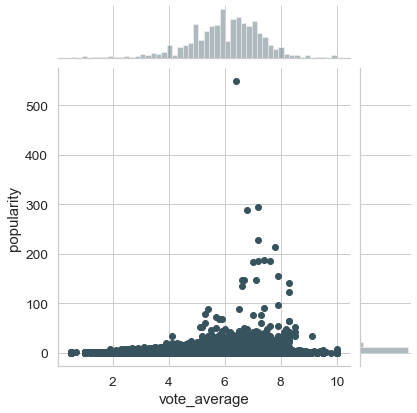

In [49]:
sns.jointplot(x="vote_average", y="popularity", data=tmdb)

Do **vote average** and **vote count** share a tangible relationship? There is a very small correlation between Vote Count and Vote Average. A large number of votes on particular movie does not necessarily imply that the movie is good.

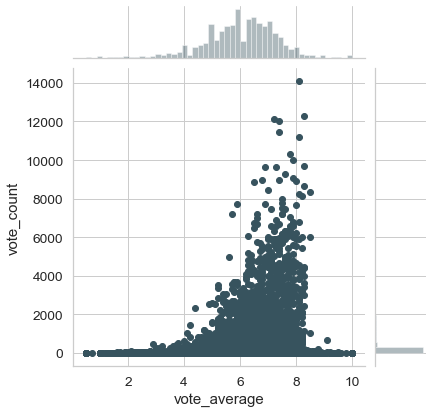

In [51]:
sns.jointplot(x="vote_average", y="vote_count", data=tmdb)

### Movie Release Date

Release Dates can often play a very important role in determining the success and the revenue generated by a particular movie. In this section, we will try and gain insights about release dates in terms of years, months and days of the week. We have already constructed the **year** feature. Let us extract month and day too.

In [ ]:
monthOrder = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
dayOrder = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

In [ ]:
def getMonth(x):
    try:
        return monthOrder[int(str(x).split("-")[1])-1]
    except:
        return np.nan

In [ ]:
def getDay(x):
    try:
        year, month, day = (int(i) for i in x.split("-"))
        result = datetime.date(year, month, day).weekday()
        return dayOrder[result]
    except:
        return np.nan

In [ ]:
tmdb["day"] = tmdb["release_date"].apply(getDay)
tmdb["month"] = tmdb["release_date"].apply(getMonth)

**January** is the most popular month when it comes to movie releases. In Hollywood circles, this is also know as the dump month when sub par movies are released by dozen. 

<AxesSubplot:title={'center':'Number of Movies Released in a Particular Month'}, xlabel='month', ylabel='count'>

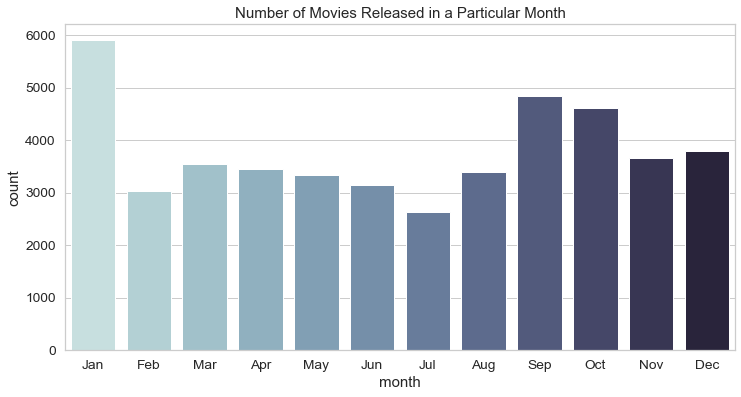

In [ ]:
# https://seaborn.pydata.org/tutorial/color_palettes.html

plt.figure(figsize=(12,6))
plt.title("Number of Movies Released in a Particular Month")
sns.countplot(x="month", data=tmdb, order=monthOrder, palette="ch:start=.2,rot=-.3")

In which months do blockbuster movies tend to release? To answer this question, we will consider all movies that have made in excess of 100 million dollars and calculate the average gross for each month. **April, May** and **June** have the highest average gross among high grossing movies. This can be attributed to the fact that blockbuster movies are usually released in the summer when kids are out of school and parents are on vacation and therefore, the audience is more likely to spend this disposible income on entertainment

<AxesSubplot:title={'center':'Average Gross by Month for Blockbuster Movies'}, xlabel='mon', ylabel='revenue'>

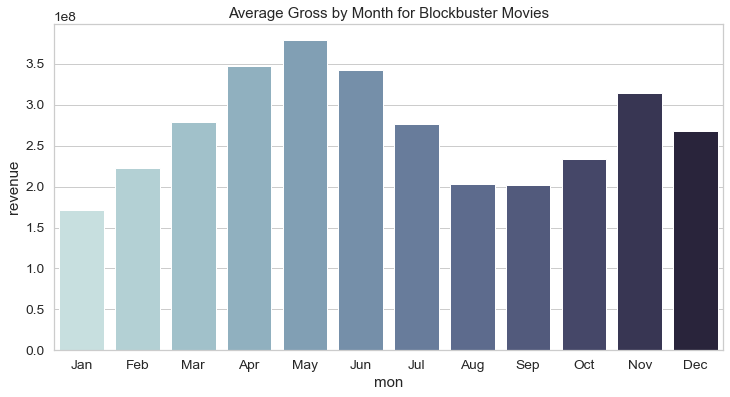

In [ ]:
monthMean = pd.DataFrame(tmdb[tmdb["revenue"]>1e8].groupby("month")["revenue"].mean())
monthMean["mon"] = monthMean.index 
plt.figure(figsize=(12,6))
plt.title("Average Gross by Month for Blockbuster Movies")
sns.barplot(x="mon", y="revenue", data=monthMean, order=monthOrder, palette="ch:start=.2,rot=-.3")

Do some months tend to be more sucessful than others? Let us visualise the boxplot between the return and months. **June** and **July** tend to yield the highest median returns. **Septmeber** is the least successful months on the aforementioned metrics. Again, the success of June and July movies can be attributed to them being summer months and time of vacation. September usually denotes the beginning of the school/college semester and hence a slight reduction in the consumption of movies.

(0.0, 12.0)

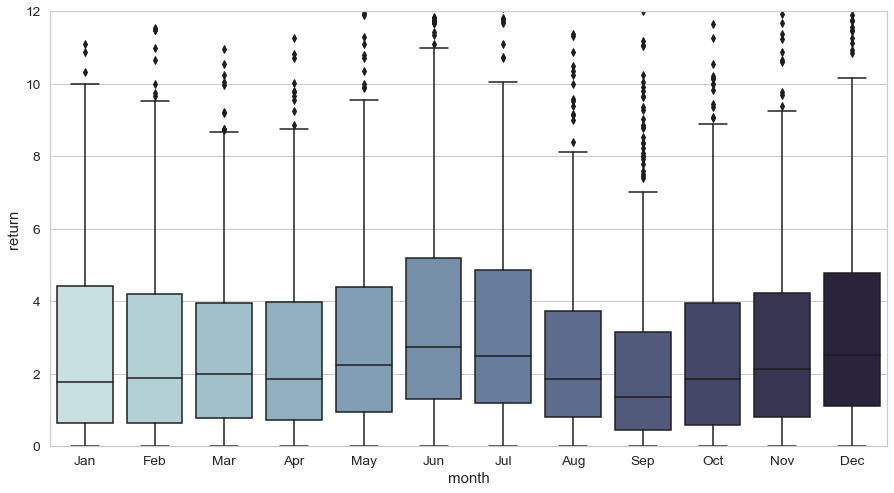

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
sns.boxplot(x="month", y="return", data=tmdb[tmdb["return"].notnull()], palette="ch:start=.2,rot=-.3", ax=ax, order=monthOrder)
ax.set_ylim([0,12])

Now let us have a look at the most popular days. **Friday** is the most popular days for movie releases. This is understandable considering that it usually denotes the beginning of the weekend. **Sunday** and **Monday** are the least popular days and this can be attributed to "its a weekend!" mood !

<AxesSubplot:title={'center':'Number of Movies released on a particular day'}, xlabel='day', ylabel='count'>

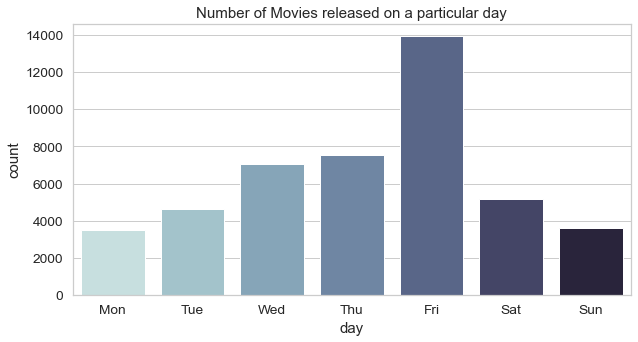

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day")
sns.countplot(x="day", data=tmdb, order=dayOrder, palette="ch:start=.2,rot=-.3")

### Number of Movies by Year

The Dataset of 45,000 movies available to us does not represent the entire corpus of movies released since the inception of cinema. However, it is reasonable to assume that it does include almost every major film released in Hollywood as well as other major film industries across the world (such as Bollywood from India). With this assumption in mind, let us take a look at the number of movies produced by the year.

Notice that there is a sharp rise in the number of movies **staring the 1990s decade**. However, we will not look too much into this as it is entirely possible that recent movies were oversampled for the purpose for this Dataset.

<AxesSubplot:xlabel='year'>

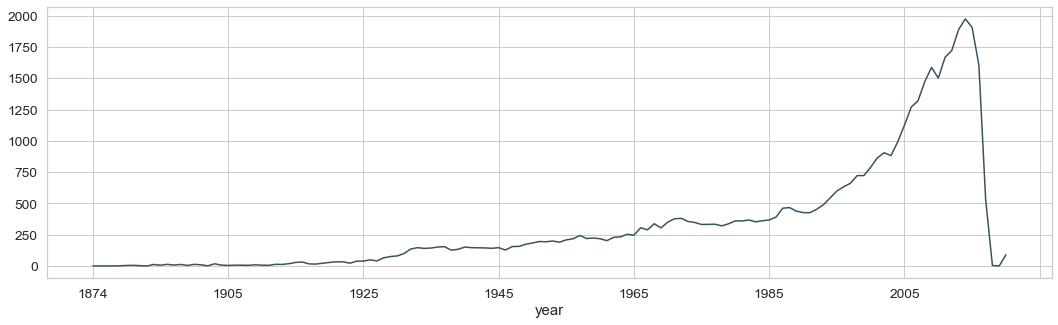

In [ ]:
yearCount = tmdb.groupby("year")["title"].count()
plt.figure(figsize=(18,5))
yearCount.plot()

### Earliest Movies Represented

The oldest movies **Passage of Venus** was a series of photographs of the transit of the planet Venus across the Sun in 1874. They were taken in Japan by French astronomer Pierre Janssen suing his "photographic revolver". This is the oldest movie on both IMDB and TMDB.

In [ ]:
tmdb[tmdb["year"] != "Nat"][["title", "year"]].sort_values("year").head(10)

,title,year
34940,Passage of Venus,1874
34937,Sallie Gardner at a Gallop,1878
41602,Buffalo Running,1883
34933,Man Walking Around a Corner,1887
34938,Traffic Crossing Leeds Bridge,1888
34934,Accordion Player,1888
34936,"Monkeyshines, No. 2",1890
39954,"Monkeyshines, No. 3",1890
34935,"Monkeyshines, No. 1",1890
34939,London's Trafalgar Square,1890


Let us construct a heatmap to indicate movie releases by month and year for all movies released in this particular century. This will give us a good idea of the **hot** and **cold** months for movie buffs.

In [ ]:
month = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12}

In [ ]:
tmdb20 = tmdb.copy()
tmdb20["year"] = tmdb20[tmdb20["year"] != "NaT"]["year"].astype(int)
tmdb20 = tmdb20[tmdb20["year"] >= 2000]
hmap20 = pd.pivot_table(data=tmdb20, index="month", columns="year", aggfunc="count", values="title")
hmap20 = hmap20.fillna(0)

<AxesSubplot:xlabel='year', ylabel='month'>

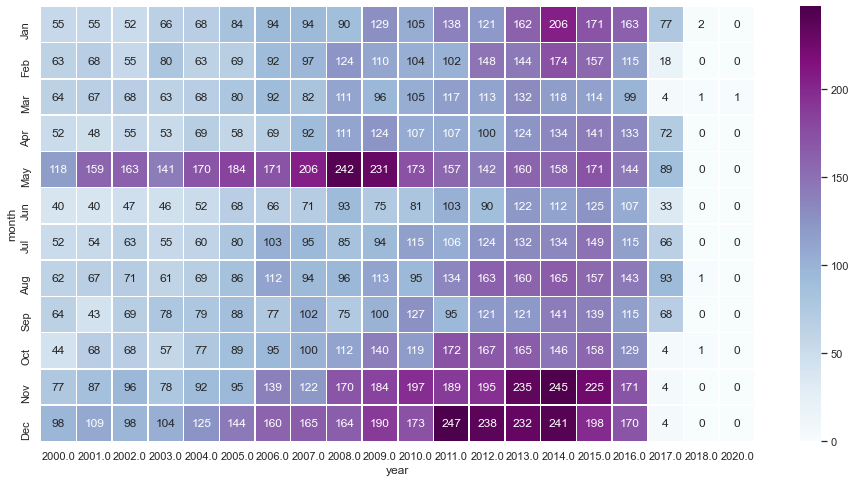

In [ ]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(hmap20, annot=True, linewidths=0.5, ax=ax, fmt="n", yticklabels=monthOrder, cmap="BuPu")

### Movie Status

Although not entirely relevant to our analysis of movies, gathering information on the various kinds of movies based on their status of release can provide us interesting insight on the nature of the movies present in our dataset. My preliminary hunch was that almost every movie has the **Released** status. Let's find out.

Almost every movie is indeed released. However, it is interesting to see that MovieLens has user ratings for movies that are still in the planning, production and post production stage. We will take this information into account while building our collaborative filtering recommendation engine.

In [ ]:
tmdb["status"].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

### Spoken Languages

Does the number of spoken languages influence the success of a movie? To do this, we will convert our **spoken_language** feature to a numeric feature denoting the number of languages spoken in that film. Majority of the movies have just one language spoken in the entire duration of the film. **19** is the highest number of languages spoken in a film. 

In [ ]:
tmdb["spoken_languages"] = tmdb["spoken_languages"].fillna("[]").apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x, list) else np.nan)

In [ ]:
tmdb["spoken_languages"].value_counts()

1     33736
2      5371
0      3835
3      1705
4       550
5       178
6        62
7        14
8         6
9         5
10        1
12        1
13        1
19        1
Name: spoken_languages, dtype: int64

Let's take a look at all the films with more than 10 spoken languages. The movie with the most number of languages **Visions of Europe** is actually a collection of 25 short films by 25 different European directors. This explains the sheer diversity of the movie in terms of language.

In [ ]:
tmdb[tmdb["spoken_languages"] >= 10][["title", "year", "spoken_languages"]].sort_values("spoken_languages", ascending=False)

,title,year,spoken_languages
22235,Visions of Europe,2004,19
35288,The Testaments,2000,13
14093,To Each His Own Cinema,2007,12
8789,The Adventures of Picasso,1978,10


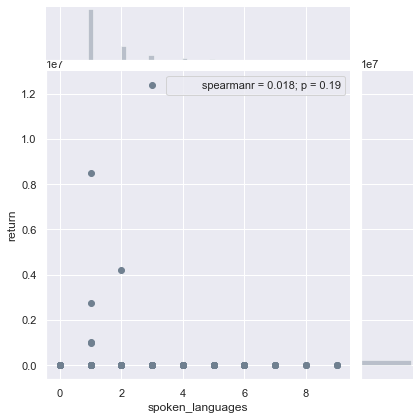

In [ ]:
## ??
sns.jointplot(x="spoken_languages", y="return", data=tmdb, stat_func=stats.spearmanr, color="slategrey")

### Runtime

From its humble beginnings of 1 minute silent, black & white clips to epic 3 hour visual delights, movies have come a long way in terms of runtime. In this section, let us try and gain some additional insights about the nature of movie lengths and their evolution over time. The average length of a movie is about 1 hr 30 mins. The longest movie on record in this dataset is a staggering 1256 mins, or 20 hours long ! Gasp !

In [ ]:
tmdb["runtime"].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

We are aware that most movies are less than 5 hours (or 300 mins) long. Let us plot a distribution of these mainstream movies.

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("GnBu_d")

<AxesSubplot:xlabel='runtime'>

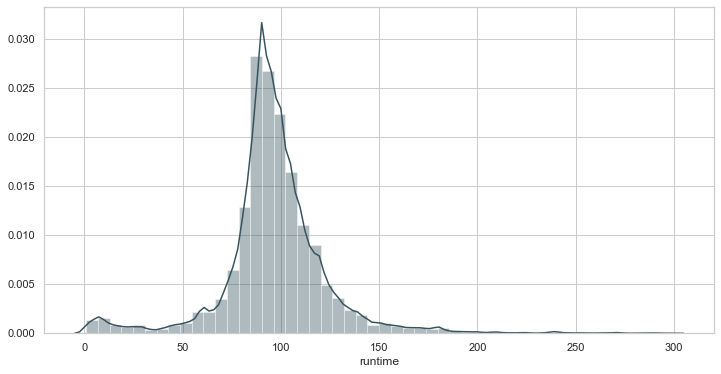

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(tmdb[(tmdb["runtime"]<300) & (tmdb["runtime"]>0)]["runtime"])

Is there any meaningful relationship between runtime and return? Let's find out. There seems to be relationship between two quantities. **The duration of a movie is independent of its success**. 

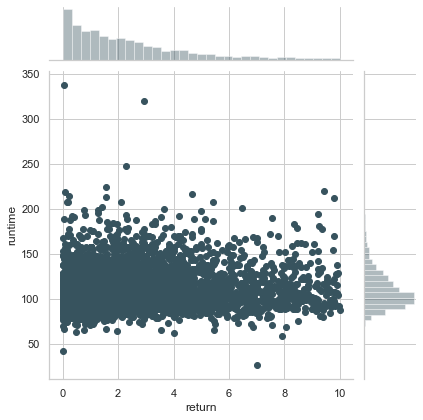

In [ ]:
tmdbRun = tmdb[(tmdb["return"].notnull()) * (tmdb["runtime"]>0) & (tmdb["return"]<10)]
sns.jointplot("return", "runtime", data=tmdbRun)
plt.show()

However, I have a feeling this might not be the case with duration and budget. A longer movie should entail a higher budget. Let us find out if this is really the case. The two quantities have a much weaker correlation than i had expected. In retrospect, the genre of the movie tends to have a much greater impact on budget. A 3 hour art film will cost significantly lesser than a 90 minute Sci-Fi movie.

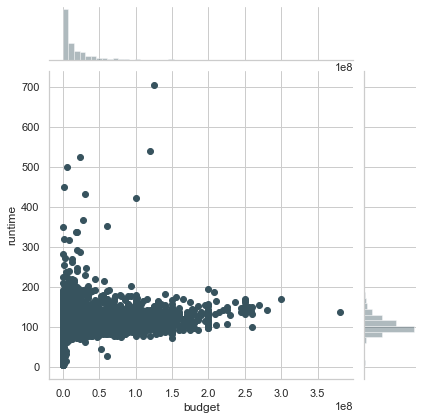

In [ ]:
tmdbRun = tmdb[(tmdb["budget"].notnull()) & (tmdb["runtime"]>0)]
sns.jointplot("budget", "runtime", data=tmdbRun)
plt.show()

Next, I'd like to see the average lengths of movies through time, right from 1890s to the 2017s. It would be interesting to see the trends in what filmmakers adjudged would be the appropriate length of a movie at that time. We noticed the films starting **60 minute makr as early as 1914.** Starting **1924**, films started having the traditional 90 minute duration and has remained more or less constant ever since.

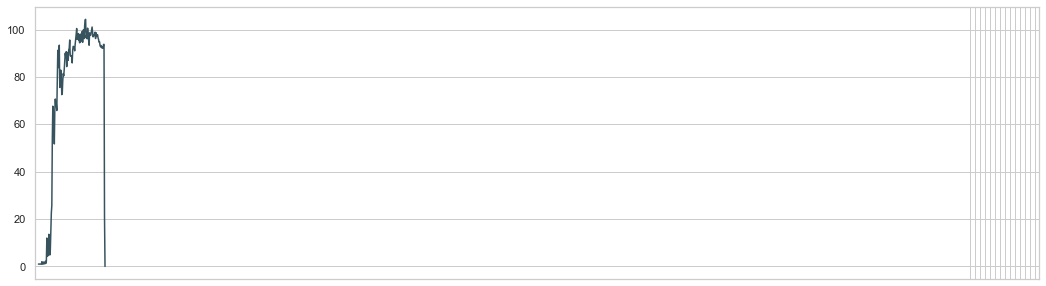

In [ ]:
plt.figure(figsize=(18,5))
yearRun = tmdb[tmdb["year"] != "NaT"].groupby("year")["runtime"].mean()
plt.plot(yearRun.index, yearRun)
plt.xticks(np.arange(1874, 2024, 10.0))
plt.show()

**Shortest Runtime Movie**. We see that every movie in this list except **A Gathering of Cats** were filmed in the late 1890s and the beginning oof 20th century. All these movies were one minute long.

In [ ]:
tmdb[tmdb["runtime"]>0][["runtime", "title", "year"]].sort_values("runtime").head(10)

,runtime,title,year
35146,1.0,La Vague,1891
36577,1.0,Champs de Mars,1900
36576,1.0,Palace of Electricity,1900
44965,1.0,"Luis Martinetti, Contortionist",1894
42357,1.0,A Gathering of Cats,2007
36575,1.0,Eiffel Tower from Trocadero Palace,1900
36574,1.0,Panorama of Eiffel Tower,1900
44714,1.0,The Infernal Caldron,1903
19244,1.0,The Kiss,1896
44646,1.0,The Vanishing Lady,1896


**Longest Runtime Movie**. We notice that almost all the entries in the above chart are actually miniseries and hence, do not count as feature length films. We cannot gather too much insight from this list of longest runtime movies as there is no way of distinguishing feature length films from TV Mini Series from our dataset (except manual research).

In [ ]:
tmdb[tmdb["runtime"]>0][["runtime", "title", "year"]].sort_values("runtime", ascending=False).head(10)

,runtime,title,year
24178,1256.0,Centennial,1978
40938,1140.0,Baseball,1994
19965,1140.0,Jazz,2001
13767,931.0,Berlin Alexanderplatz,1980
13953,925.0,Heimat: A Chronicle of Germany,1984
27855,900.0,The Story of Film: An Odyssey,2011
26682,877.0,Taken,2002
19158,874.0,The War,2007
34667,840.0,The Roosevelts: An Intimate History,2014
34732,840.0,Seventeen Moments in Spring,1973


### Budget

Let us now turn our attention to budget. We expect budgets to be skewed quantity and also heavily influenced by inflation. Nevertheless, it would be interesting to gather as much insights as possible from this quantity as budget is often a critical feature in predicting movie revenue and success. As a start, let us gather the summary statistics for our budget.

The mean budget of a film is 21.6 million dollars wheresa the median budget is far smaller at 8 million dollars. This strongly suggests the mean being influenced by outliers.

The distribution of movie budgets shows an exponential decay. More than 75% of the movies have a budget smaller than 25 million dollars. 

In [ ]:
tmdb["budget"].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

<AxesSubplot:xlabel='budget'>

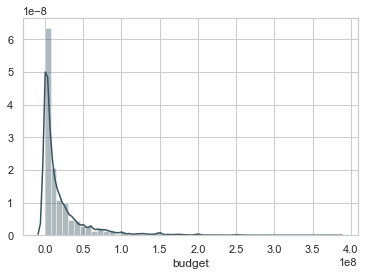

In [ ]:
sns.distplot(tmdb[tmdb["budget"].notnull()]["budget"])

<AxesSubplot:ylabel='Frequency'>

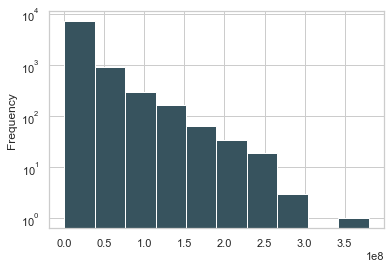

In [ ]:
tmdb["budget"].plot(logy=True, kind="hist")

**Most Expensive Movies of All Time**. Two **Pirates of the Carribean** films occupy the top spots in this list with a staggering budget of over **300 million dollars**. All the top 10 most expensive films made a profit on their investment except for **The Lone Ranger** which managed to recoup less than 35% of its investment, taking in a paltry 90 million dollars on a **255 million dollar** budget.

In [ ]:
tmdb[tmdb["budget"].notnull()][["title", "budget", "revenue", "return", "year"]].sort_values("budget", ascending=False).head(10)

,title,budget,revenue,return,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2.751878,2011
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,3.203333,2007
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015
11067,Superman Returns,270000000.0,3.910812e+08,1.448449,2006
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2.326701,2017
16130,Tangled,260000000.0,5.917949e+08,2.276134,2010
18685,John Carter,260000000.0,2.841391e+08,1.092843,2012
11780,Spider-Man 3,258000000.0,8.908716e+08,3.452991,2007
21175,The Lone Ranger,255000000.0,8.928991e+07,0.350157,2013
22059,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,3.833600,2013


How strong a correlation does the budget hold with the revenue? A strong correlation would directly imply more accurate forecasts. The pearson r value of **0.73** between the two quantities indicates a very strong correlation

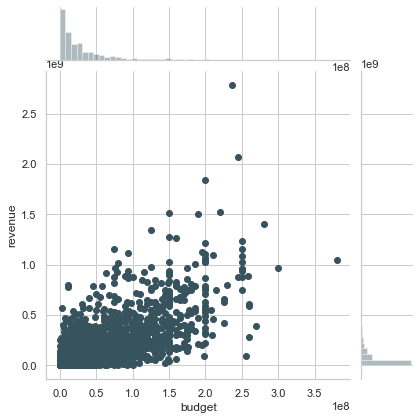

In [ ]:
sns.jointplot(x="budget", y="revenue", data=tmdb[tmdb["return"].notnull()])

### Revenue

The final numeric feature we will explore is the revenue. The revenue is probably the most important numeric quantity associated with a movie. We will try to predict the revenue for movies given a set of features in a later section. The treatment of revenue will be very similar to that of budget and we will once again begin by studyin the summary statictics.

The mean gross of a movie is **68.7 mil dollars** whereas the median gross is much lower at **16.8 mil dollars**, suggesting the skewed nature of revenue. The lowest revenue generated by a movie is **just 1 dollar** whereas the highest grossing movie of all time has raked in an astonishing **2.78 bil dollars**.

In [ ]:
tmdb["revenue"].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

The distribution of revenue undergoes exponential decay just like budget. We also found that the two quantities were strongly correlated.

<AxesSubplot:xlabel='revenue'>

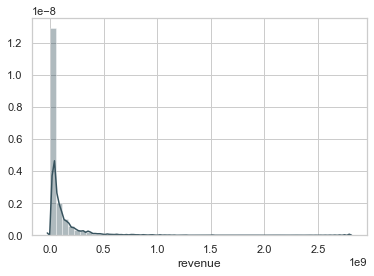

In [ ]:
sns.distplot(tmdb[tmdb["revenue"].notnull()]["revenue"])

### Highest Grossing Films of All Time

These figures have not been adjusted for inflation. Therefore, we see a disproportionate number of movies from very recent times in the top 10 list. 

In [ ]:
grossTop = tmdb[["poster_path", "title", "budget", "revenue", "year"]].sort_values("revenue", ascending=False).head(10)
pd.set_option("display.max_colwidth", 100)
HTML(grossTop.to_html(escape=False))

,poster_path,title,budget,revenue,year
14551,,Avatar,237000000.0,2.787965e+09,2009
26555,,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015
1639,,Titanic,200000000.0,1.845034e+09,1997
17818,,The Avengers,220000000.0,1.519558e+09,2012
25084,,Jurassic World,150000000.0,1.513529e+09,2015
28830,,Furious 7,190000000.0,1.506249e+09,2015
26558,,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
17437,,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011
22110,,Frozen,150000000.0,1.274219e+09,2013
42222,,Beauty and the Beast,160000000.0,1.262886e+09,2017


In [ ]:
pd.set_option("display.max_colwidth", 50)

To get an understanding of the revenue garnered by movies, let us plot the maximum revenue through the years. As can be seen from the figure, the maximum gross has steadily risen over the years. The world of movies broke the 1 billion dollar mark in 1997 with the release of **Titanic**. It took another 12 years to break the 2 billion dollar mark with **Avatar**. Both these movies were directed by James Cameron.

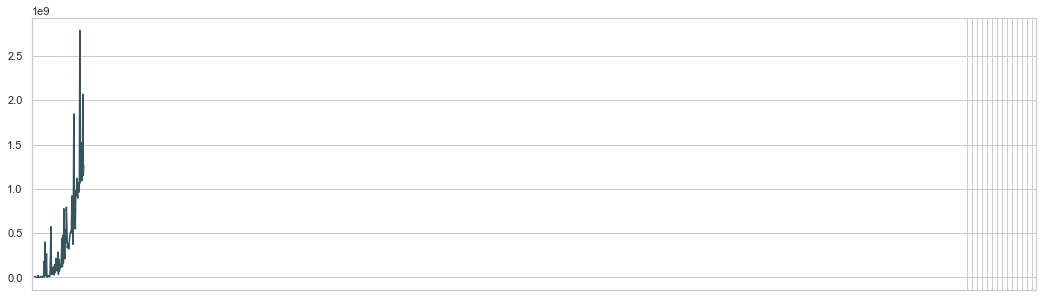

In [ ]:
plt.figure(figsize=(18,5))
yearRevenue = tmdb[(tmdb["revenue"].notnull()) & (tmdb["year"] != "NaT")].groupby("year")["revenue"].max()
plt.plot(yearRevenue.index, yearRevenue)
plt.xticks(np.arange(1874, 2024, 10.0))
plt.show()

### Returns

We will not look too much into returns for the time being. Let us just check the least and the most successful movies of all time. To do this, we will only consider those movies which have a budget greater than 5 million dollars.

**Most Successful Movies**

In [ ]:
tmdb[(tmdb["return"].notnull()) & (tmdb["budget"] > 5e6)][["title", "budget", "revenue", "return", "year"]].sort_values("return", ascending=False).head(10)

,title,budget,revenue,return,year
1065,E.T. the Extra-Terrestrial,10500000.0,792965326.0,75.520507,1982
256,Star Wars,11000000.0,775398007.0,70.490728,1977
1338,Jaws,7000000.0,470654000.0,67.236286,1975
1888,The Exorcist,8000000.0,441306145.0,55.163268,1973
352,Four Weddings and a Funeral,6000000.0,254700832.0,42.450139,1994
834,The Godfather,6000000.0,245066411.0,40.844402,1972
4492,Look Who's Talking,7500000.0,296000000.0,39.466667,1989
24258,Annabelle,6500000.0,255273813.0,39.272894,2014
1056,Dirty Dancing,6000000.0,213954274.0,35.659046,1987
1006,The Sound of Music,8200000.0,286214286.0,34.904181,1965


**Worst Box Office Disasters**

In [ ]:
tmdb[(tmdb["return"].notnull()) & (tmdb["budget"]>5e6) & (tmdb["revenue"]>10000)][["title", "budget", "revenue", "return", "year"]].sort_values("return").head(10)

,title,budget,revenue,return,year
11159,Chaos,20000000.0,10289.0,0.000514,2005
19027,5 Days of War,20000000.0,17479.0,0.000874,2011
21034,Special Forces,10000000.0,10759.0,0.001076,2011
25732,Foodfight!,65000000.0,73706.0,0.001134,2012
38388,Term Life,16500000.0,21256.0,0.001288,2016
19505,Laurence Anyways,9500000.0,12250.0,0.001289,2012
12038,The Good Night,15000000.0,20380.0,0.001359,2007
3966,Cherry 2000,10000000.0,14000.0,0.001400,1987
22097,Twice Born,13000000.0,18295.0,0.001407,2012
5651,All The Queen's Men,15000000.0,23000.0,0.001533,2001


With these analysis in place, we are in a good position to construct our correlation matrix.

In [ ]:
tmdb["year"] = tmdb["year"].replace("NaT", np.nan)

In [ ]:
tmdb["year"] = tmdb["year"].apply(cleanNumeric)

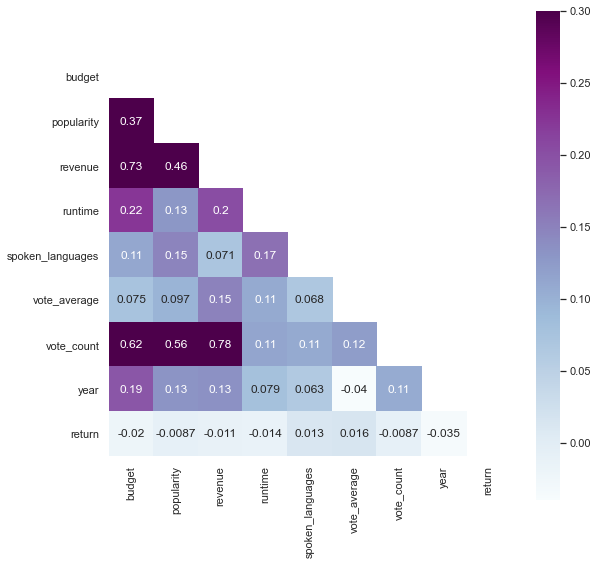

In [ ]:
sns.set(font_scale=1)
corr = tmdb.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=0.3, square=True, annot=True, cmap="BuPu")

### Genres

TMDB defines 32 differnt genres for our set of 45,000 movies. 

In [ ]:
tmdb["genres"] = tmdb["genres"].fillna("[]").apply(ast.literal_eval).apply(lambda x:[i["name"] for i in x] if isinstance(x, list) else[])

In [ ]:
gen = tmdb.apply(lambda x: pd.Series(x["genres"]), axis=1).stack().reset_index(level=1, drop=True)
gen.name = "genre"

In [ ]:
genDF = tmdb.drop("genres", axis=1).join(gen)

In [ ]:
genDF["genre"].value_counts().shape[0]

32

Let's have a look at the most commonly occuring genres in movies. **Drama** is the most commonly occuring genre with almost half the movies identifying itself as a drama film. **Comedy** comes in at a distant second with 25% of the movies having adequate doses of humour. Other major genres represented in the top 10 are Action, Horror, Crime, Mystery, Science Fiction, Animation, Fantasy.

In [ ]:
popGen = pd.DataFrame(genDF["genre"].value_counts()).reset_index()
popGen.columns = ["genre", "movies"]
popGen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


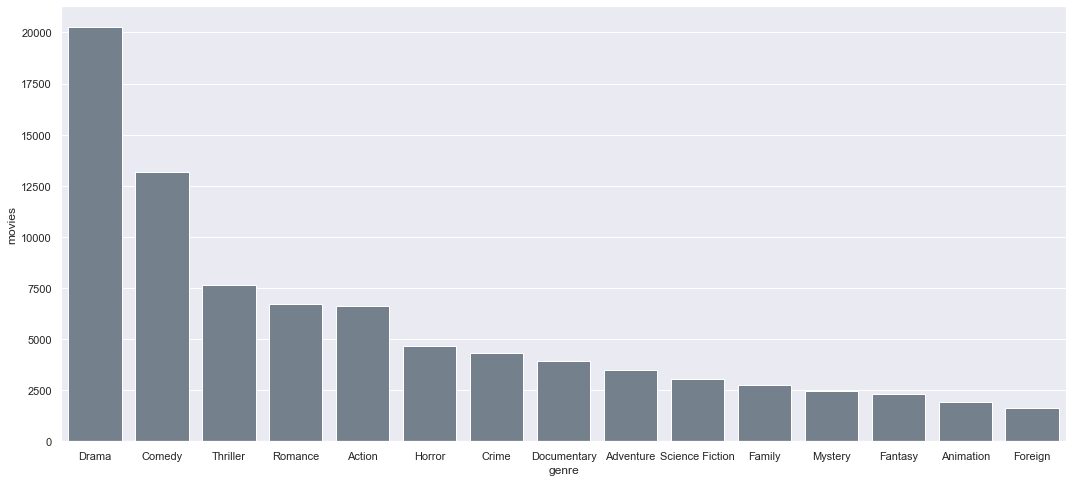

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x="genre", y="movies", data=popGen.head(15), color="slategrey")
plt.show()

The next question I'm looking to answer is the trends in the share of genres of movies across the world. Has the demand for Science Fiction movies increased ? Do certain years have a disproportionate share of Animation Movies? We will only be looking at trends starting 2000. We will consider only those themes that appear in the top 15 most popular genres, excluding Documentaries, Family and Foreign Movies from our analysis.

The proportion of movies of each genre has remained fairly constant since the beginning of this century except **Drama**. The proportion of drama films has fallen by over 5%. **Thriller** movies have enjoyed a slight increase in their share.

In [ ]:
genres = ["Drama", "Comedy", "Thriller", "Romance", "Action", "Horror", "Crime", "Adventure", "Science Fiction", "Mystery", "Fantasy", "Animation"]

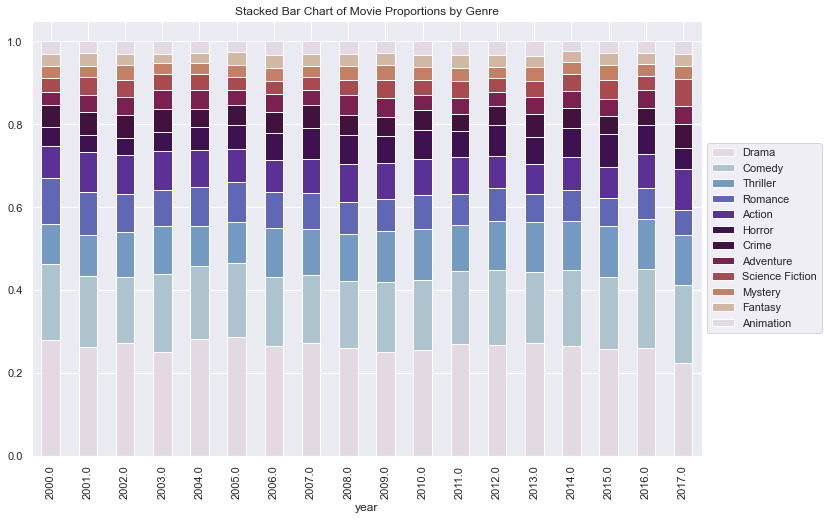

In [ ]:
popGenMovie = genDF[(genDF["genre"].isin(genres)) & (genDF["year"]>=2000) & (genDF["year"]<=2017)]
ctab = pd.crosstab([popGenMovie["year"]], popGenMovie["genre"]).apply(lambda x: x/x.sum(), axis=1)
ctab[genres].plot(kind="bar", stacked=True, colormap="twilight", figsize=(12,8)).legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.show()

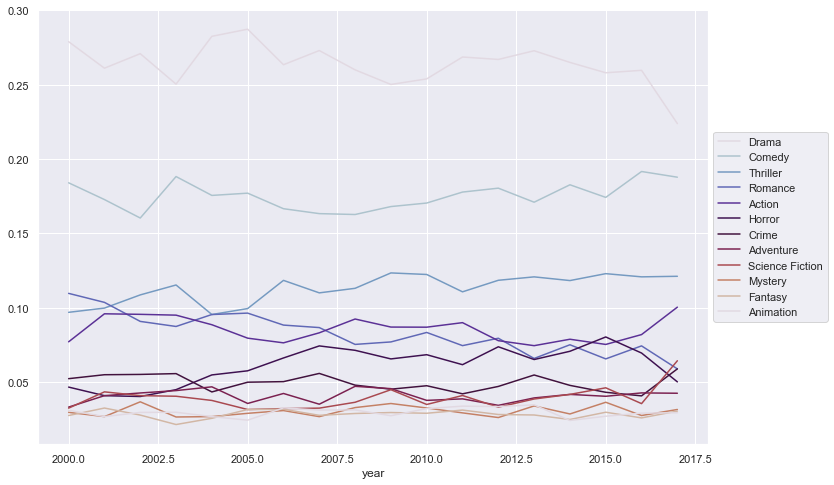

In [ ]:
ctab[genres].plot(kind="line", stacked=False, colormap = "twilight", figsize=(12,8)).legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.show()

One question that I have always had is that if some genres are particularly more successful than others. For example, we should expect Science Fiction and Fantasy Movies to bring in more revenue than other genres but when normalized with their budget, do they prove to be as successful? We will visualize two violin plots to answer the question. One will be genres versus the revenue while the other will be versus returns.

**Animation** has the largest 25-75 range as well as the median revenue among all the genres plotted. **Fantasy** and **Science Fiction** have the second and third highest median revenue respectively.

From the boxplot, it seems like **Animation** tend to yield the highest returns on average. **Horror** also tend to be a good bet. This is partially due to the nature of Horror Movies being low budget compared to Fantasy Movies but being capable of generating very high revenues relative to its budget.

In [ ]:
genreVio = ["Drama", "Comedy", "Thriller", "Romance", "Action", "Horror", "Crime", "Adventure", "Science Fiction", "Mystery", "Fantasy", "Animation"]
movieVio = genDF[(genDF["genre"].isin(genreVio))]

<Figure size 1296x576 with 0 Axes>

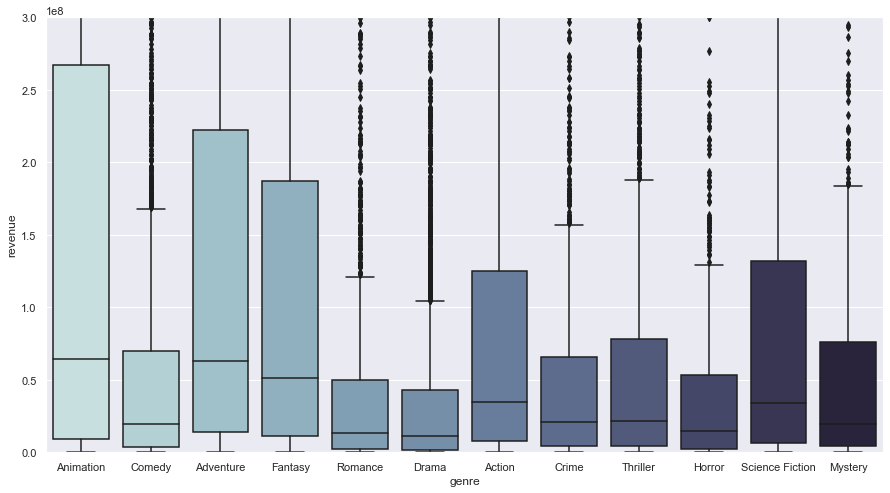

In [ ]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
sns.boxplot(x="genre", y="revenue", data=movieVio, palette="ch:start=.2,rot=-.3", ax=ax)
ax.set_ylim([0,3e8])
plt.show()

### Cast and Crew

* **cast**: A stringified list of dictionaries consisting of cast names and the corresponding characters they played
* **crew**: A stringified list of dictionaries consisting of crew names and the function they performed
* **id**: The TMDB ID of Movie

Let us now take a look at the cast and crew of our movies. We do not have these details with us in our main dataset. However, we have a separate file consisting of the full cast and crew credits of all the Movielens Movies. Let us take a look at this credit data.

In [ ]:
tmdbCredit = pd.read_csv("/Users/wonghuiee/AI_DataScience/Xccelerate/04MLApplications/TMDB/Dataset/credits.csv")
tmdbCredit.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


We need to perform a left join of our original movies metadata dataframe with the credits dataframe on the TMDB Movie ID. Before we are able to perform this join, we need to make sure that the ID column of our main dataframe is clean and of type integer. To do this, let us try to perform an integer conversion of our IDs and if an exception is raised, we will replace the ID with NaN. We will then proceed to drip these rows from our dataframe.

In [ ]:
def convertInt(x):
    try:
        return int(x)
    except: return np.nan

In [ ]:
tmdb["id"] = tmdb["id"].apply(convertInt)

In [ ]:
tmdb[tmdb["id"].isnull()]

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,status,tagline,title,video,vote_average,vote_count,year,return,day,month
19730,0.065736,NaN,"[Carousel Productions, Vision View Entertainme...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,104.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Midni...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,1.931659,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,68.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Mardo...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,2.185485,NaN,"[Odyssey Media, Pulser Productions, Rogue Stat...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,82.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Avala...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tmdb = tmdb.drop([19730, 29503, 35587])

In [ ]:
tmdb["id"] = tmdb["id"].astype("int")

In [ ]:
tmdb = tmdb.merge(tmdbCredit, on="id")
tmdb.shape

(45538, 27)

In [ ]:
tmdb["cast"] = tmdb["cast"].apply(ast.literal_eval)
tmdb["crew"] = tmdb["crew"].apply(ast.literal_eval)

In [ ]:
tmdb["cast_size"] = tmdb["cast"].apply(lambda x: len(x))
tmdb["crew_size"] = tmdb["crew"].apply(lambda x: len(x))

In [ ]:
tmdb["cast"] = tmdb["cast"].apply(lambda x: [i["name"] for i in x] if isinstance(x, list) else[])

In [ ]:
def getDirector(x):
    for i in x:
        if i["job"] == "Director":
            return i["name"]
    return np.nan

In [ ]:
tmdb["director"] = tmdb["crew"].apply(getDirector)

In [ ]:
act = tmdb.apply(lambda x: pd.Series(x["cast"]), axis=1).stack().reset_index(level=1, drop=True)
act.name = "actor"
tmdbCast = tmdb.drop("cast", axis=1).join(act)

**Actors with the Highest Total Revenue**

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("GnBu_d")

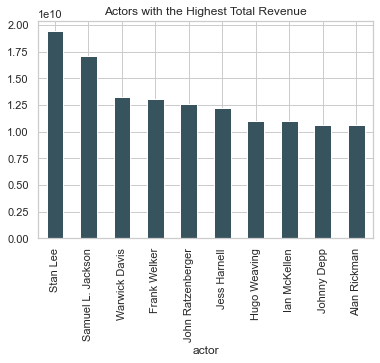

In [ ]:
plt.title("Actors with the Highest Total Revenue")
tmdbCast.groupby("actor")["revenue"].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plt.show()

**Directors with the Highest Total Revenue**

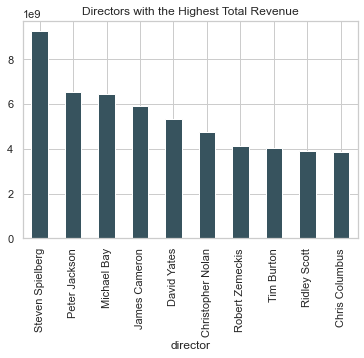

In [ ]:
plt.title("Directors with the Highest Total Revenue")
tmdb.groupby("director")["revenue"].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plt.show()

For average revenues, we will consider only actors and directors who have acted and directed in at least 5 movies respectively.

In [ ]:
actorLst = tmdbCast.groupby("actor")["revenue"].count().sort_values(ascending=False)
actorLst = list(actorLst[actorLst >= 5].index)
directorLst = tmdb.groupby("director")["revenue"].count().sort_values(ascending=False)
directorLst = list(directorLst[directorLst >= 5].index)

**Actors with Highest Average Revenue**

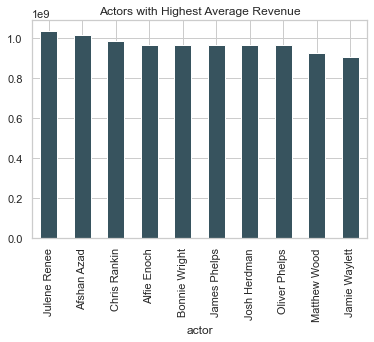

In [ ]:
plt.title("Actors with Highest Average Revenue")
tmdbCast[tmdbCast["actor"].isin(actorLst)].groupby("actor")["revenue"].mean().sort_values(ascending=False).head(10).plot(kind="bar")
plt.show()

**Directors with Highest Average Revenue**

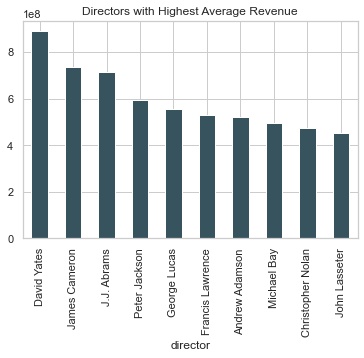

In [ ]:
plt.title("Directors with Highest Average Revenue")
tmdb[tmdb["director"].isin(directorLst)].groupby("director")["revenue"].mean().sort_values(ascending=False).head(10).plot(kind="bar")
plt.show()

**Most Successful Actor**

In [ ]:
tmdbSuccess = tmdbCast[(tmdbCast["return"].notnull()) & (tmdbCast["revenue"]>1e7) & (tmdbCast["actor"].isin(actorLst))]
pd.DataFrame(tmdbSuccess.groupby("actor")["return"].mean().sort_values(ascending=False).head(10))

,return
actor,
Jami Gertz,3.099099e+06
Donna Mitchell,2.479289e+06
Andrew McCarthy,2.479280e+06
Nicholas Pryor,1.770914e+06
James Spader,1.549551e+06
Michael Bowen,1.033038e+06
Robert Downey Jr.,5.165189e+05
Martin Kove,3.395458e+05
William Zabka,3.395441e+05


**Most Successful Directors**

In [ ]:
tmdbSuccess = tmdb[(tmdb["return"].notnull()) & (tmdb["revenue"]>1e7) & (tmdb["director"].isin(directorLst))]
pd.DataFrame(tmdbSuccess.groupby("director")["return"].mean().sort_values(ascending=False).head(10))

,return
director,
John G. Avildsen,169822.750468
George A. Romero,60.656935
George Lucas,54.328446
Martha Coolidge,49.553131
Davis Guggenheim,46.243000
George Miller,39.076975
James Wan,27.659835
Guy Hamilton,25.779057
John Badham,25.433532


**John G. Avildsen** has an unnaturally high return. All the other directors in the list are nowhere close to the level of return that he has gained. Let's have a look at his movies. 

**The Karate Kid, PartII** has a budget of only 113 mil dollars. This seems like an anomaly since official figures state that the movie cost 13 mil dollars. So, although he has directed amazing movies, he does not belong to this list.

In [ ]:
tmdb[(tmdb["director"] == "John G. Avildsen") & (tmdb["return"].notnull())][["title", "budget", "revenue", "return", "year"]]

,title,budget,revenue,return,year
1853,Rocky,1000000.0,117235147.0,1.172351e+02,1976.0
2307,Rocky V,42000000.0,119946358.0,2.855866e+00,1990.0
2315,The Karate Kid,8000000.0,90815558.0,1.135194e+01,1984.0
2316,"The Karate Kid, Part II",113.0,115103979.0,1.018619e+06,1986.0
5226,Joe,106000.0,19319254.0,1.822571e+02,1970.0
5658,Neighbors,8500000.0,29916207.0,3.519554e+00,1981.0


# 4--Regression: Predicting Movie Revenues

In this section, I will attempt at building a regression model to predict movie revenues. Since this isn't one of the main goals of this project, I will not spend too much time feature engineering or hyperparameter tuning my model.

Prediction Movie Revenue is an extremely popular problem in Machine Learning which has created a huge amount of literature. Most of the models proposed in these papers use far more potent features than what we possess at the moment. These include Facebook Page Likes, Information on Tweets about the Movie, YouTube Trailer Reaction (Views, Likes, Dislikes, etc), Movie Rating (MPCAA, CBIFC) among many others.

For a great project on Movie Box Office Predictions, check out Aarti Annaswamy's excellent project here: https://github.com/aannasw/movies-capstone

To compensate for the lack of these features, we are going to cheat a little. We will be using **TMDB Popularity Score** and **Vote Average** as our features in our model to assign a numerical value to popularity. However, it must be kept in mind that these metrics will not be available when predicting movie revenues in real world, when the movie has not been released yet.

We have **5395 records** in our training set. Let us look at the features we possess and remove the ones which are unnecessary.

In [ ]:
tmdbReg = tmdb[tmdb["return"].notnull()]
tmdbReg.shape

(5393, 30)

In [ ]:
tmdbReg.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'year', 'return', 'day', 'month',
       'cast', 'crew', 'cast_size', 'crew_size', 'director'],
      dtype='object')

In [ ]:
tmdbReg = tmdbReg.drop(["id", "overview", "poster_path", "release_date", "status", "tagline", "video", "return", "crew"], axis=1)

We will perform the following feature engineering task:

1) **belongs_to_collection** will be turned into a Boolean variable. 1 indicates a movie is aprt of collection whereas 0 indicates it is not
2) **genres** will be converted into number of genres
3) **homepage** will be converted into a Boolean variable that will indicate if a movie has a homepage or not
4) **original_language** will be replaced by a feature called **is_foreign** to denote if a particular film is in English or a Foreign Language
5) **production_companies** will be replaced with just the number of production companies collaborating to make the movie
6) **day** will be converted into a binary feature to indicate if the film was released on a Friday
7) **month** will be converted into a variable that indicates it the month was a holiday season

In [ ]:
gen = tmdbReg.apply(lambda x: pd.Series(x["genres"]), axis=1).stack().reset_index(level=1, drop=True)
gen.name = "genre"
genReg = tmdbReg.drop("genres", axis=1).join(gen)
genTrain = genReg["genre"].drop_duplicates()

In [ ]:
def featureEngineering(tmdb):
    
    tmdb["belongs_to_collection"] = tmdb["belongs_to_collection"].apply(lambda x:0 if x==np.nan else 1)
    for genre in genTrain:
        tmdb["is_" + str(genre)] = tmdb["genres"].apply(lambda x: 1 if genre in x else 0)
    tmdb["genres"] = tmdb["genres"].apply(lambda x: len(x))
    tmdb["homepage"] = tmdb["homepage"].apply(lambda x: 0 if x==np.nan else 1)
    tmdb["is_english"] = tmdb["original_language"].apply(lambda x:1 if x=="en" else 0)
    tmdb = tmdb.drop("original_language", axis=1)
    tmdb["production_companies"] = tmdb["production_companies"].apply(lambda x: len(x))
    tmdb["production_countries"] = tmdb["production_countries"].apply(lambda x: len(x))
    tmdb["is_Friday"] = tmdb["day"].apply(lambda x: 1 if x=="Fri" else 0)
    tmdb = tmdb.drop("day", axis=1)
    tmdb["is_Holiday"] = tmdb["month"].apply(lambda x:1 if x in ["Apr", "May", "Jun", "Nov"] else 0)
    tmdb = tmdb.drop("month", axis=1)
    tmdb = tmdb.drop(["title", "cast", "director"], axis=1)
    tmdb = pd.get_dummies(tmdb, prefix="is")
    tmdb["runtime"] = tmdb["runtime"].fillna(tmdb["runtime"].mean())
    tmdb["vote_average"] = tmdb["vote_average"].fillna(tmdb["vote_average"].mean())

    return tmdb


In [ ]:
X, y = tmdbReg.drop("revenue", axis=1), tmdbReg["revenue"]

In [ ]:
X = featureEngineering(X)

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25)

In [ ]:
X.shape

(5393, 38)

We get a Coefficient of Determination of **0.80** which is a pretty score for the basic model that we have built

In [ ]:
reg = GradientBoostingRegressor()
reg.fit(train_X, train_y)
reg.score(test_X, test_y)

0.7497042458373043

Let's compare our model's score to a Dummy Regressor. We see that our model performs far more superiorly than the Dummy Regressor.

In [ ]:
dummy = DummyRegressor()
dummy.fit(train_X, train_y)
dummy.score(test_X, test_y)

-0.0013390416385814508

Finally, let us plot the feature importances in the form of a bar plot to deduce which features were the most significant in our making predictions. We notice that **vote_count**, a feature we cheated with, is the most important feature to our Gradient Boosting Model. This goes on to show the importance of popularity metrics in determining the revenue of a movie. **Budget** was the second most important feature followed by **Popularity** (Literally a popularity metric) and **Crew Size**.

<AxesSubplot:>

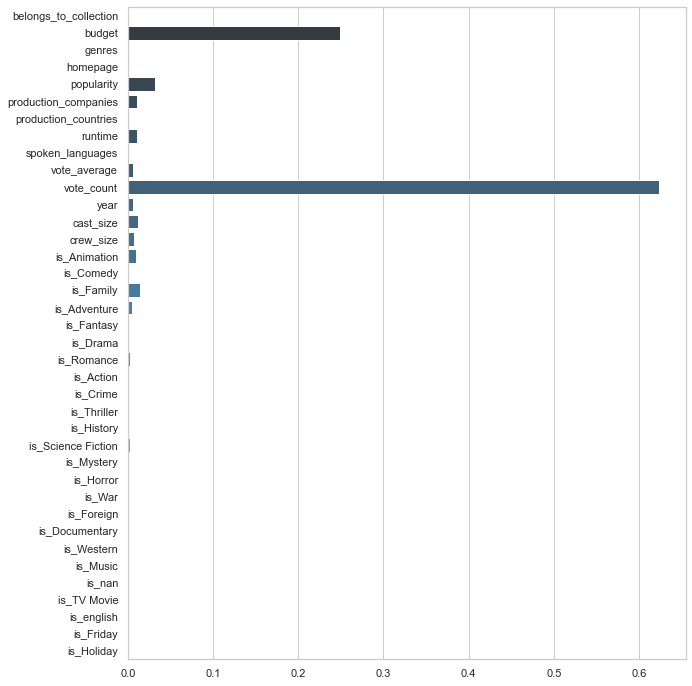

In [ ]:
plt.figure(figsize=(10,12))
sns.set_style("whitegrid")
sns.barplot(x=reg.feature_importances_, y=X.columns, palette="Blues_d")

# 5--Classification: Predicting Movie Success

What factors influence whether a movie will be able to recoup its investments? I will try to answer this question by building a binary classifier that predicts if a movie will make a profit or a loss. As with our regression model, we will cheat a little and use features that may not be available to us in the real world for the lack of other useful popularity metrics.

We have already performed extensive analysis of our data and haven's done a lot with respect to determining factors that make a movie a success. We shall attempt at doing that in this section and follow it up by building our model.

In [ ]:
tmdbCla = tmdb[tmdb["return"].notnull()]
tmdbCla.shape

(5393, 30)

In [ ]:
tmdbCla.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'year', 'return', 'day', 'month',
       'cast', 'crew', 'cast_size', 'crew_size', 'director'],
      dtype='object')

In [ ]:
tmdbCla = tmdbCla.drop(["id", "overview", "poster_path", "release_date", "status", "tagline", "revenue"], axis=1)

Let us convert our **return** feature into a binary variable that will serve as our classes: **0** indicating a flop and **1** indicating a hit

In [ ]:
tmdbCla["return"] = tmdbCla["return"].apply(lambda x:1 if x>=1 else 0)

In [ ]:
tmdbCla["return"].value_counts()

1    3784
0    1609
Name: return, dtype: int64

Our classes seem to be fairly balanced. We do not need to apply any additional methods to deal with the imbalance of classes. Let us now turn our attention to our features.

In [ ]:
tmdbCla["belongs_to_collection"] = tmdbCla["belongs_to_collection"].fillna("").apply(lambda x:0 if x=="" else 1)

It seems that movies that belong to a fanchise have a higher probability of being a success

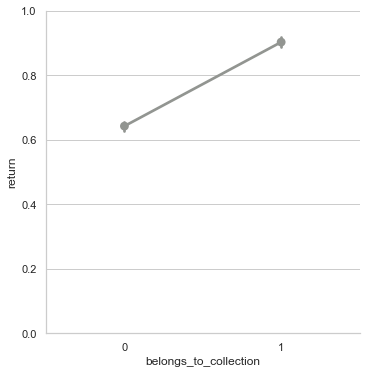

In [ ]:
sns.set(style="whitegrid")
succ = sns.PairGrid(data=tmdbCla, x_vars=["belongs_to_collection"], y_vars="return", size=5)
succ.map(sns.pointplot, color=sns.xkcd_rgb["grey"])
succ.set(ylim=(0,1))

We see that with homepages, there is not a very huge difference in probability. To avoid the curse of dimensionality, we will eliminate this feature as it is not very useful.

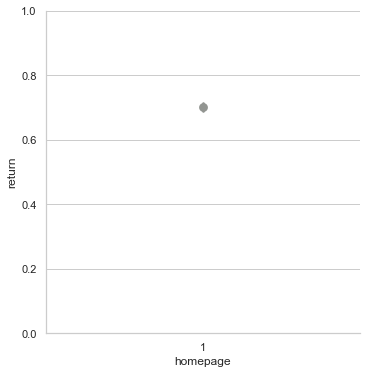

In [ ]:
tmdbCla["homepage"] = tmdbCla["homepage"].fillna("").apply(lambda x:0 if x=="" else 1)
succ = sns.PairGrid(data=tmdbCla, x_vars=["homepage"], y_vars="return", size=5)
succ.map(sns.pointplot, color=sns.xkcd_rgb["grey"])
succ.set(ylim=(0,1))

In [ ]:
succ = tmdbCla.apply(lambda x: pd.Series(x["genres"]), axis=1).stack().reset_index(level=1, drop=True)
succ.name = "genre"
genCla = tmdbCla.drop("genres", axis=1).join(succ)

We find that **TV Movies** have a 0% Failure Rate but that is most probably because they are extremely few in number. **Foreign Films** have a higher rate of failure than average. 

<AxesSubplot:xlabel='genre'>

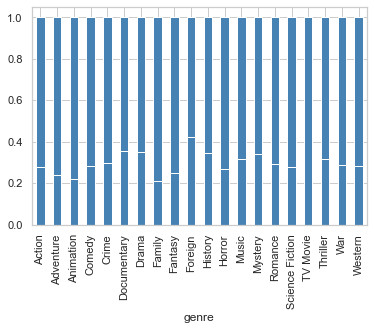

In [ ]:
ctab = pd.crosstab([genCla["genre"]], genCla["return"], dropna=False).apply(lambda x: x/x.sum(), axis=1)
ctab.plot(kind="bar", stacked=True, legend=False, color="steelblue")

Since there isn't anything drastic about a particular genre, we will process with one hot encoding all genres.

In [ ]:
tmdbCla.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'popularity', 'production_companies',
       'production_countries', 'runtime', 'spoken_languages', 'title', 'video',
       'vote_average', 'vote_count', 'year', 'return', 'day', 'month', 'cast',
       'crew', 'cast_size', 'crew_size', 'director'],
      dtype='object')

In [ ]:
def classificationEngineering(tmdb):

    for genre in genTrain:
        tmdb["is_" + str(genre)] = tmdb["genres"].apply(lambda x: 1 if genre in x else 0)
        tmdb["genres"] = tmdb["genres"].apply(lambda x: len(x))
        tmdb = tmdb.drop("homepage", axis=1)
        tmdb["is_english"] = tmdb["original_language"].apply(lambda x:1 if x=="en" else 0)
        tmdb = tmdb.drop("original_language", axis=1)
        tmdb["production_companies"] = tmdb["production_companies"].apply(lambda x: len(x))
        tmdb["production_countries"] = tmdb["production_countries"].apply(lambda x: len(x))
        tmdb["is_Friday"] = tmdb["day"].apply(lambda x:1 if x=="Fri" else 0)
        tmdb = tmdb.drop("day", axis=1)
        tmdb["is_Holiday"] = tmdb["month"].apply(lambda x:1 if x in ["Apr", "May", "Jun", "Nove"] else 0)
        tmdb = tmdb.drop("month", axis=1)
        tmdb = tmdb.drop(["title", "cast", "director"], axis=1)
        tmdb["runtime"] = tmdb["runtime"].fillna(tmdb["runtime"].mean())
        tmdb["vote_average"] = tmdb["vote_average"].fillna(tmdb["vote_average"].mean())
        tmdb = tmdb.drop("crew", axis=1)

        return tmdb

In [ ]:
tmdbCla = classificationEngineering(tmdbCla)

In [ ]:
tmdbCla.columns

Index(['belongs_to_collection', 'budget', 'genres', 'popularity',
       'production_companies', 'production_countries', 'runtime',
       'spoken_languages', 'video', 'vote_average', 'vote_count', 'year',
       'return', 'cast_size', 'crew_size', 'is_Animation', 'is_english',
       'is_Friday', 'is_Holiday'],
      dtype='object')

In [ ]:
X, y = tmdbCla.drop("return", axis=1), tmdbCla["return"]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y)

Our basic Gradient Boosting Classifer has an accuracy of **80%**. Again, this model can be improved upon through hyperparameter tuning and more advanced feature engineering but since this is not the main objective. I will skip this

In [ ]:
clf = GradientBoostingClassifier()
clf.fit(train_X, train_y)
clf.score(test_X, test_y)

0.7835433654558932

In [ ]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(train_X, train_y)
dummy.score(test_X, test_y)

0.7020014825796886

We see that **Vote Count** is once again the most significant feature identified by our Classifier. Other important features include **Budget, Popularity and Year**. With this, we will conclude our discussion on the classification model and move on to the main part of the project.

<AxesSubplot:>

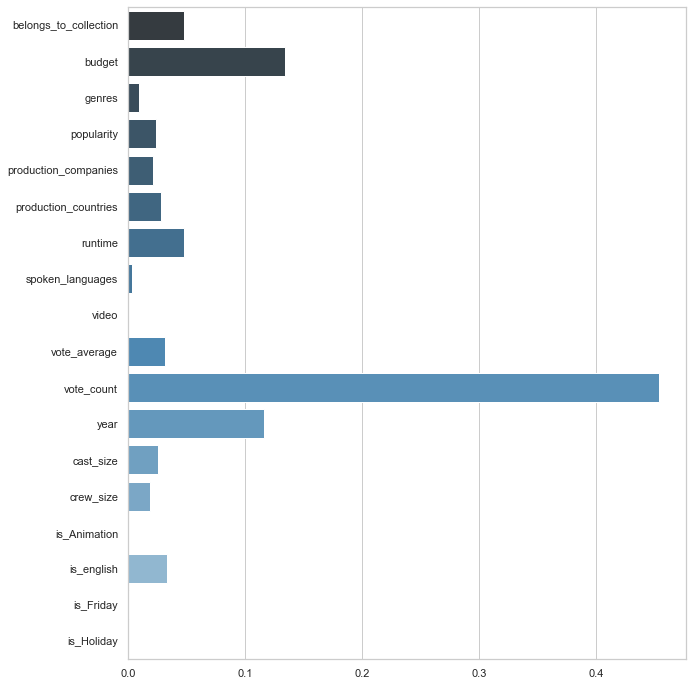

In [ ]:
plt.figure(figsize=(10,12))
sns.set_style("whitegrid")
sns.barplot(x=clf.feature_importances_, y=X.columns, palette="Blues_d")

In the next notebook, I will try to build a **Hybrid Recommendation System** based on popularity, content and collaborative filtering. This will use the MovieLens dataset in addition to the TMDB Movies Metadata that we have used here.